# Data Loading

In [ ]:
!kaggle datasets download -d danofer/sarcasm
!unzip sarcasm.zip

Dataset URL: https://www.kaggle.com/datasets/danofer/sarcasm
License(s): copyright-authors
 99% 214M/216M [00:06<00:00, 44.5MB/s]
100% 216M/216M [00:06<00:00, 33.7MB/s]
Archive:  sarcasm.zip
  inflating: test-balanced.csv       
  inflating: test-unbalanced.csv     
  inflating: train-balanced-sarc.csv.gz  
  inflating: train-balanced-sarcasm.csv  


In [ ]:
import pandas as pd

dataset = pd.read_csv("train-balanced-sarcasm.csv")

# Data Analysis

In [ ]:
dataset.head()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...


In [10]:
dataset.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010826 entries, 0 to 1010825
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   label           1010826 non-null  int64 
 1   comment         1010771 non-null  object
 2   author          1010826 non-null  object
 3   subreddit       1010826 non-null  object
 4   score           1010826 non-null  int64 
 5   ups             1010826 non-null  int64 
 6   downs           1010826 non-null  int64 
 7   date            1010826 non-null  object
 8   created_utc     1010826 non-null  object
 9   parent_comment  1010826 non-null  object
dtypes: int64(4), object(6)
memory usage: 588.1 MB


In [ ]:
dataset.shape

(1010826, 10)

# Data Cleaning

Checking for null values and removing them

In [ ]:
print("Number of NULL values:")
print(dataset.isnull().sum())

print("Number of NULL values post-removal:")
dataset.dropna(inplace=True)
print(dataset.isnull().sum())

Number of NULL values:
label              0
comment           55
author             0
subreddit          0
score              0
ups                0
downs              0
date               0
created_utc        0
parent_comment     0
dtype: int64
Number of NULL values post-removal:
label             0
comment           0
author            0
subreddit         0
score             0
ups               0
downs             0
date              0
created_utc       0
parent_comment    0
dtype: int64


Checking for duplicate values and removing them

In [ ]:
print("Number of Duplicate Values:")
print(dataset.duplicated().sum())

print("Number of Duplicate Values post-removal:")
dataset.drop_duplicates(inplace=True)
print(dataset.duplicated().sum())

Number of Duplicate Values:
28
Number of Duplicate Values post-removal:
0


Class Distribution

In [ ]:
dataset["label"].value_counts()

,count
label,
0,505403
1,505340


In [ ]:
dataset.drop(["author", "subreddit", "score", "ups", "downs", "date", "created_utc", "parent_comment"], axis=1, inplace=True)

Data preprocessing

In [ ]:
!pip install contractions

In [ ]:
import re
import contractions

def preprocessing(text):
    text = text.lower().strip()
    text = contractions.fix(text)
    text = re.sub('\n', '', text)
    
    re.sub(r"([?!,+=—&%\'\";:|\(\){}\[\]//])", r" \1 ", text)
    re.sub('[ ]{2,}', ' ', text).strip()

    return text

In [ ]:
dataset["comment"] = dataset["comment"].apply(preprocessing)
dataset.head()

,label,comment
0,0,nc and nh.
1,0,you do know west teams play against west teams...
2,0,"they were underdogs earlier today, but since g..."
3,0,"this meme is not funny none of the ""new york n..."
4,0,i could use one of those tools.


# Data Visualization

Class Distribution Plot

In [ ]:
from matplotlib import pyplot as plt

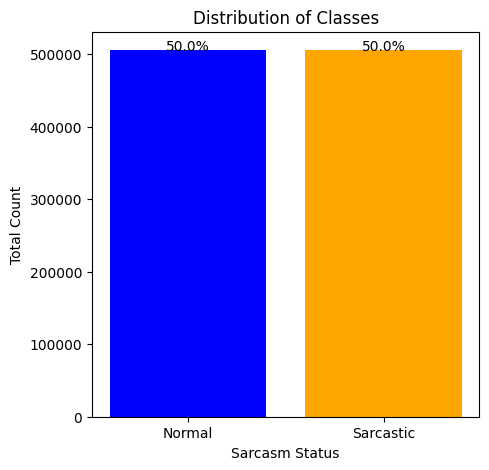

In [ ]:
class_counts = dataset["label"].value_counts()

plt.figure(figsize=(5, 5))
plt.bar(class_counts.index, class_counts.values, color=["blue", "orange"])

plt.xticks([0, 1], ["Normal", "Sarcastic"])
plt.xlabel("Sarcasm Status")
plt.ylabel("Total Count")
plt.title("Distribution of Classes")

total = class_counts.sum()
for i, count in enumerate(class_counts):
    plt.text(i, count + 3, f"{(count/total)*100:.1f}%", ha="center")

plt.show()

Comment length distribution Plot

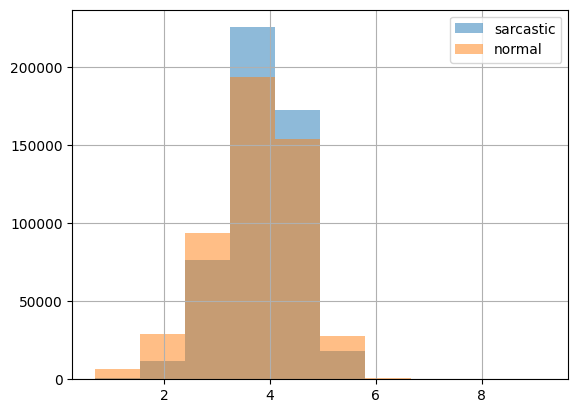

In [ ]:
dataset.loc[dataset["label"] == 1, "comment"].str.len().apply(np.log1p).hist(label="sarcastic", alpha=.5)
dataset.loc[dataset["label"] == 0, "comment"].str.len().apply(np.log1p).hist(label="normal", alpha=.5)
plt.legend()

# Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X = dataset["comment"]
y = dataset["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19, stratify=y)

# Cross-Validation Strategy

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=19)

# Machine Learning Models

TF-IDF + Bag of Words Vectorization:

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

TFIDF_vectorizer = TfidfVectorizer(ngram_range=(1, 3), max_features=50000)
BoW_vectorizer = CountVectorizer(ngram_range=(1, 3), max_features=50000)

In [ ]:
X_train_tfidf = TFIDF_vectorizer.fit_transform(X_train)
X_test_tfidf = TFIDF_vectorizer.transform(X_test)

X_train_BoW = BoW_vectorizer.fit_transform(X_train)
X_test_BoW = BoW_vectorizer.transform(X_test)

Apply Cross-Validation

In [ ]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.model_selection import cross_val_predict, cross_validate
from sklearn.metrics import confusion_matrix

models = [
    ("Logistic Regression (TF-IDF)", LogisticRegression(C=0.5, penalty="l2", max_iter=1000), X_train_tfidf, y_train),
    ("Ridge Regression (TF-IDF)", RidgeClassifier(alpha=1.0), X_train_tfidf, y_train),
    ("Logistic Regression (BoW)", LogisticRegression(C=0.5, penalty="l2", max_iter=1000), X_train_BoW, y_train),
    ("Ridge Regression (BoW)", RidgeClassifier(alpha=1.0), X_train_BoW, y_train),
]


confusion_matrices = {}
results = {}

for name, model, X_train_vec, y_train_vec in models:
    print(f"\n{name} = {model.__class__.__name__}()")

    scores = cross_validate(model, X_train_vec, y_train_vec, cv=skf, scoring=["accuracy", "f1", "recall", "precision"])

    accuracy = scores["test_accuracy"]
    f1 = scores["test_f1"]
    recall = scores["test_recall"]
    precision = scores["test_precision"]

    results[name] = {
        "Accuracy": accuracy.mean(),
        "F1": f1.mean(),
        "Recall": recall.mean(),
        "Precision": precision.mean()
    }

    print(f"Cross-validated Accuracy: {accuracy.mean():.4f} +/- {accuracy.std():.4f}")
    print(f"Cross-validated F1 Score: {f1.mean():.4f} +/- {f1.std():.4f}")
    print(f"Cross-validated Recall: {recall.mean():.4f} +/- {recall.std():.4f}")
    print(f"Cross-validated Precision: {precision.mean():.4f} +/- {precision.std():.4f}")

    y_pred = cross_val_predict(model, X_train_vec, y_train_vec, cv=skf)

    cm = confusion_matrix(y_train_vec, y_pred)
    confusion_matrices[name] = cm
    print(f"Confusion Matrix:\n{cm}")
    print("=" * 80)


Logistic Regression (TF-IDF) = LogisticRegression()
Cross-validated Accuracy: 0.7192 +/- 0.0015
Cross-validated F1 Score: 0.7067 +/- 0.0016
Cross-validated Recall: 0.6766 +/- 0.0017
Cross-validated Precision: 0.7395 +/- 0.0016
Confusion Matrix:
[[307988  96334]
 [130741 273531]]

Ridge Regression (TF-IDF) = RidgeClassifier()
Cross-validated Accuracy: 0.7153 +/- 0.0005
Cross-validated F1 Score: 0.7053 +/- 0.0006
Cross-validated Recall: 0.6816 +/- 0.0009
Cross-validated Precision: 0.7308 +/- 0.0004
Confusion Matrix:
[[302802 101520]
 [128712 275560]]

Logistic Regression (BoW) = LogisticRegression()
Cross-validated Accuracy: 0.7192 +/- 0.0008
Cross-validated F1 Score: 0.7044 +/- 0.0009
Cross-validated Recall: 0.6692 +/- 0.0011
Cross-validated Precision: 0.7434 +/- 0.0009
Confusion Matrix:
[[310948  93374]
 [133716 270556]]

Ridge Regression (BoW) = RidgeClassifier()
Cross-validated Accuracy: 0.7121 +/- 0.0009
Cross-validated F1 Score: 0.6952 +/- 0.0010
Cross-validated Recall: 0.6568 +/-

Plot Confusion Matrices

In [ ]:
def plot_confusion_matrices(confusion_matrices):
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    axes = axes.flatten()

    for i, (name, cm) in enumerate(confusion_matrices.items()):
        sns.heatmap(cm, annot=True, fmt="d", ax=axes[i], cmap="Blues")
        axes[i].set_title(name)
        axes[i].set_xlabel("Predicted label")
        axes[i].set_ylabel("True label")
        axes[i].set_xticklabels(["Normal", "Sarcastic"])
        axes[i].set_yticklabels(["Normal", "Sarcastic"])

    plt.tight_layout()
    plt.show()

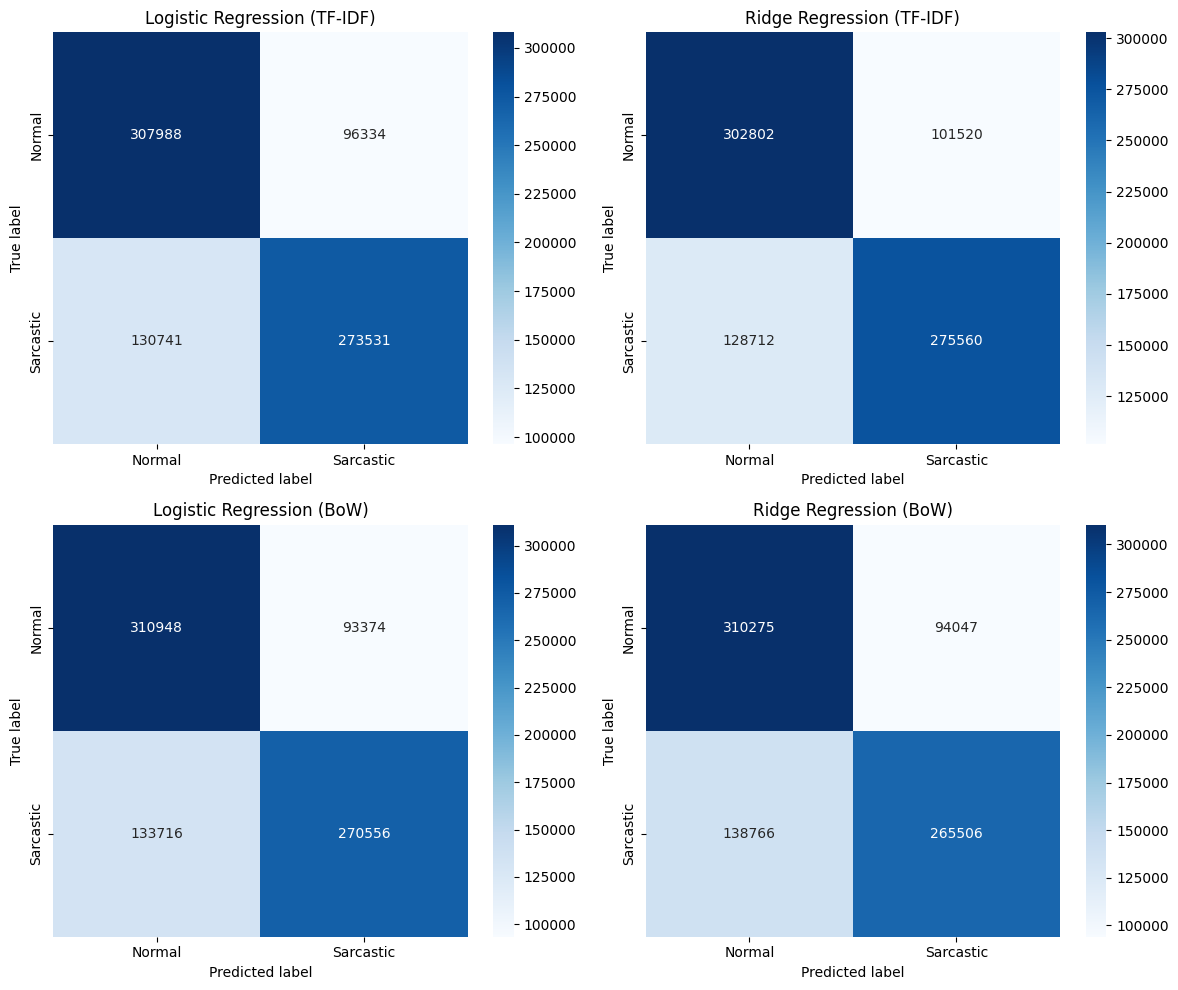

In [ ]:
plot_confusion_matrices(confusion_matrices)

Train the best model

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

best_model = LogisticRegression(C=0.5, penalty="l2", max_iter=1000)
best_X_train = X_train_tfidf
best_y_train = y_train

best_model.fit(best_X_train, best_y_train)

y_pred_test = best_model.predict(X_test_tfidf)

print("\nTest Set Performance:")
print(classification_report(y_test, y_pred_test))

accuracy = accuracy_score(y_test, y_pred_test)
print(f"Test Set Accuracy: {accuracy:.4f}")


Test Set Performance:
              precision    recall  f1-score   support

           0       0.71      0.76      0.73    101081
           1       0.74      0.68      0.71    101068

    accuracy                           0.72    202149
   macro avg       0.72      0.72      0.72    202149
weighted avg       0.72      0.72      0.72    202149

Test Set Accuracy: 0.7223


# Deep Learning Models:

## Tokenization

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


tokenizer = Tokenizer(num_words=40000)
tokenizer.fit_on_texts(X_train)

tokenized_train = tokenizer.texts_to_sequences(X_train)
X_train_padded = pad_sequences(tokenized_train, maxlen=100)

tokenized_test = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(tokenized_test, maxlen=100)

vocabulary_size = len(tokenizer.word_index) + 1
print(f"Vocabulary size: {vocabulary_size}")

Vocabulary size: 159149


## GloVe Embeddings

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2025-02-23 01:10:52--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-02-23 01:10:52--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-02-23 01:10:53--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
import numpy as np

def load_glove_embeddings(glove_path, embedding_dim):
    embeddings_index = {}

    with open(glove_path, encoding="utf-8") as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], dtype="float32")
            embeddings_index[word] = vector

    print(f"Loaded {len(embeddings_index)} word vectors.")
    return embeddings_index

glove_path = "glove.6B.50d.txt"
embedding_dim = 50

glove_embeddings = load_glove_embeddings(glove_path, embedding_dim)

Loaded 400000 word vectors.


In [ ]:
embedding_matrix = np.zeros((vocabulary_size, embedding_dim))

for word, i in tokenizer.word_index.items():
    embedding_vector = glove_embeddings.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

print(f"Created Embedding Matrix of Shape: {embedding_matrix.shape}")

Created Embedding Matrix of Shape: (159149, 50)
